<a href="https://colab.research.google.com/github/BhavaniVemula/Sepsis/blob/main/FINAL_DATA_ANALYSIS70.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/first_500000_rows.csv")

In [ ]:
data.head(6)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0.0,NaN,NaN,-0.02,1.0,0.0,17072.0
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0.0,NaN,NaN,-0.02,2.0,0.0,17072.0
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0.0,NaN,NaN,-0.02,3.0,0.0,17072.0
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0.0,NaN,NaN,-0.02,4.0,0.0,17072.0
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0.0,NaN,NaN,-0.02,5.0,0.0,17072.0
5,5,5,62.0,100.0,NaN,124.0,85.0,61.0,14.0,NaN,...,NaN,NaN,68.54,0.0,NaN,NaN,-0.02,6.0,0.0,17072.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357053 entries, 0 to 357052
Data columns (total 44 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        357053 non-null  int64  
 1   Hour              357053 non-null  int64  
 2   HR                329485 non-null  float64
 3   O2Sat             314160 non-null  float64
 4   Temp              120874 non-null  float64
 5   SBP               302514 non-null  float64
 6   MAP               320556 non-null  float64
 7   DBP               186439 non-null  float64
 8   Resp              321920 non-null  float64
 9   EtCO2             0 non-null       float64
 10  BaseExcess        36747 non-null   float64
 11  HCO3              28716 non-null   float64
 12  FiO2              50115 non-null   float64
 13  pH                40635 non-null   float64
 14  PaCO2             31063 non-null   float64
 15  SaO2              17579 non-null   float64
 16  AST               52

In [ ]:
data.describe()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
count,357053.000000,357053.000000,329485.000000,314160.000000,120874.000000,302514.000000,320556.000000,186439.000000,321920.000000,0.0,...,2627.000000,23253.000000,357052.000000,357052.000000,180810.000000,180810.000000,357052.000000,357052.000000,357052.000000,357052.000000
mean,25.083775,25.083775,85.002606,97.254251,37.034024,120.946666,78.741160,59.984958,18.729146,NaN,...,294.573544,198.680396,63.116435,0.581148,0.501333,0.498667,-51.370087,26.956443,0.021154,10156.150667
std,27.331721,27.331721,16.921389,2.933030,0.780671,21.488061,15.063695,12.656576,5.339299,NaN,...,162.490660,108.568251,16.121651,0.493372,0.500000,0.500000,147.269054,27.560212,0.143897,5886.642755
min,0.000000,0.000000,20.000000,20.000000,21.000000,22.000000,20.000000,20.000000,1.000000,NaN,...,34.000000,5.000000,18.110000,0.000000,0.000000,0.000000,-3710.660000,1.000000,0.000000,1.000000
25%,9.000000,9.000000,73.000000,96.000000,36.560000,105.000000,68.000000,51.000000,15.000000,NaN,...,185.000000,126.000000,52.840000,0.000000,0.000000,0.000000,-35.150000,11.000000,0.000000,5037.000000
50%,19.000000,19.000000,84.000000,98.000000,37.060000,118.000000,77.000000,58.000000,18.000000,NaN,...,247.000000,181.000000,65.380000,1.000000,1.000000,0.000000,-2.680000,21.000000,0.000000,10169.000000
75%,33.000000,33.000000,96.000000,99.500000,37.560000,134.500000,87.330000,67.000000,22.000000,NaN,...,357.000000,245.000000,76.060000,1.000000,1.000000,1.000000,-0.020000,35.000000,0.000000,15258.000000
max,335.000000,335.000000,223.000000,100.000000,42.220000,274.000000,300.000000,272.000000,69.000000,NaN,...,1246.000000,1783.000000,88.990000,1.000000,1.000000,1.000000,23.990000,336.000000,1.000000,20642.000000


In [ ]:
data.shape

(357053, 44)

In [ ]:
d=data.corr()['SepsisLabel']
print(d)

Unnamed: 0          0.149553
Hour                0.149553
HR                  0.044672
O2Sat              -0.004799
Temp                0.032678
SBP                -0.004228
MAP                -0.003193
DBP                 0.009968
Resp                0.052927
EtCO2                    NaN
BaseExcess          0.018654
HCO3               -0.021487
FiO2                0.015029
pH                  0.011188
PaCO2               0.008057
SaO2               -0.004924
AST                -0.019769
BUN                 0.039423
Alkalinephos        0.024539
Calcium            -0.018037
Chloride           -0.002342
Creatinine          0.020022
Bilirubin_direct    0.061944
Glucose             0.015436
Lactate             0.002854
Magnesium           0.000950
Phosphate           0.005334
Potassium          -0.013325
Bilirubin_total     0.064223
TroponinI          -0.057664
Hct                -0.010342
Hgb                -0.019217
PTT                 0.030240
WBC                 0.024505
Fibrinogen    

In [ ]:
d.sort_values()

,SepsisLabel
TroponinI,-0.057664
Unit2,-0.056788
HospAdmTime,-0.024140
HCO3,-0.021487
AST,-0.019769
Hgb,-0.019217
Calcium,-0.018037
Platelets,-0.017671
Potassium,-0.013325
Hct,-0.010342


In [ ]:
number_of_rows = data.shape[0]
print(number_of_rows)

357053


This dataset has 44 columns,the hospital specific data is not needed, so We are dropping the hospital specific columns, like Hour,unit1,unit2,HospAdmTime,ICULOS,unnamed and Patient_ID

In [ ]:
columns_to_drop = ['Unnamed: 0','Hour', 'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS', 'Unnamed', 'Patient_ID']
data = data.drop(columns=columns_to_drop, errors='ignore')
nan_counts = data.isna().sum()
nan_counts_sorted = nan_counts.sort_values(ascending=False)
print(nan_counts_sorted)

EtCO2               357053
TroponinI           356606
Bilirubin_direct    356555
Fibrinogen          354426
Bilirubin_total     352716
Alkalinephos        351911
AST                 351767
Lactate             345198
PTT                 339764
SaO2                339474
Calcium             339377
Phosphate           339073
Platelets           333800
Creatinine          333355
WBC                 330316
Magnesium           329322
HCO3                328337
BUN                 327949
Chloride            327477
PaCO2               325990
Hgb                 325509
BaseExcess          320306
Potassium           318321
pH                  316418
Hct                 314961
Glucose             313379
FiO2                306938
Temp                236179
DBP                 170614
SBP                  54539
O2Sat                42893
MAP                  36497
Resp                 35133
HR                   27568
Age                      1
Gender                   1
SepsisLabel              1
d

In [ ]:
nan_counts = data.isna().sum()
nan_percentage = nan_counts / number_of_rows
threshold = 0.85
columns_with_high_nan = nan_percentage[nan_percentage > threshold].index
print("Columns with more than 85% NaN values:")
print(columns_with_high_nan.tolist())

SyntaxError: invalid syntax (<ipython-input-67-9efefed97c21>, line 17)




Manhattan distance
D=|N-X|=|2-4|=
Euclidean distance


In [ ]:
import pandas as pd
null_percentage = (data.isnull().sum() / data.shape[0]) * 100
null_percentage_sorted = null_percentage.sort_values(ascending=False)
print(null_percentage_sorted)

EtCO2               100.000000
TroponinI            99.874809
Bilirubin_direct     99.860525
Fibrinogen           99.264255
Bilirubin_total      98.785334
Alkalinephos         98.559878
AST                  98.519548
Lactate              96.679765
PTT                  95.157862
SaO2                 95.076641
Calcium              95.049474
Phosphate            94.964333
Platelets            93.487521
Creatinine           93.362890
WBC                  92.511756
Magnesium            92.233366
HCO3                 91.957497
BUN                  91.848829
Chloride             91.716636
PaCO2                91.300171
Hgb                  91.165457
BaseExcess           89.708251
Potassium            89.152311
pH                   88.619337
Hct                  88.211274
Glucose              87.768202
FiO2                 85.964269
Temp                 66.146763
DBP                  47.783942
SBP                  15.274763
O2Sat                12.013062
MAP                  10.221732
Resp    

In [ ]:
data.drop(columns=columns_with_high_nan,inplace=True)

In [ ]:
data.head(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.54,0.0,0.0
1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,68.54,0.0,0.0
2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,68.54,0.0,0.0
3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,68.54,0.0,0.0
4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,68.54,0.0,0.0


In [ ]:
data.shape

(357053, 10)

<ipython-input-19-70bc74b645ed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='SepsisLabel', palette='viridis')


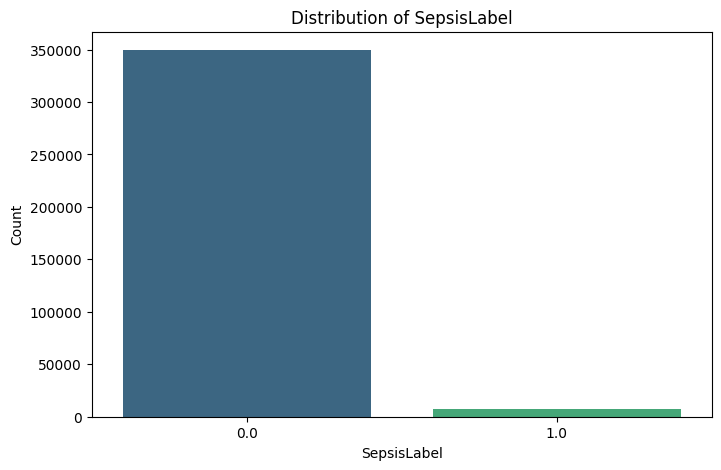

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='SepsisLabel', palette='viridis')
plt.title('Distribution of SepsisLabel')
plt.xlabel('SepsisLabel')
plt.ylabel('Count')
plt.show()
sepsis_counts = data['SepsisLabel'].value_counts()



# **Class Imbalance:**

There is a significant imbalance in the dataset. The majority of instances have a SepsisLabel of 0.0, indicating no sepsis. Only a small portion of the instances have a SepsisLabel of 1.0, indicating the presence of sepsis.

In [ ]:
required_columns = ['HR', 'Resp', 'Temp', 'DBP', 'SBP', 'MAP', 'O2Sat', 'Age', 'Gender', 'SepsisLabel']
filtered_data = data[required_columns]
filtered_data = filtered_data.drop_duplicates()
imputer = KNNImputer(n_neighbors=5)
imputed_data = pd.DataFrame(imputer.fit_transform(filtered_data), columns=filtered_data.columns)

Using Smote to handle the class imbalance

In [ ]:
from imblearn.over_sampling import SMOTE
X = imputed_data.drop('SepsisLabel', axis=1)
y = imputed_data['SepsisLabel']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
processed_data = pd.concat([X_resampled, y_resampled], axis=1)
processed_data.to_csv('processed_sepsis_data.csv', index=False)

In [ ]:
import pandas as pd
sep_data = pd.read_csv('/content/processed_sepsis_data(Final).csv')

     HR  Resp    Temp   DBP    SBP   MAP  O2Sat    Age  Gender  SepsisLabel
0  53.0  21.0  36.110  56.6  126.0  80.0   98.0  55.36     1.0          0.0
1  78.0  20.0  37.068  49.0   99.0  64.0   94.0  61.01     0.0          0.0
2  89.8  14.0  37.534  50.6  108.4  79.2   95.6  57.25     1.0          0.0
3  93.0  26.0  37.364  57.0  155.0  93.0   97.0  72.78     0.0          1.0
4  96.0  28.0  36.722  55.0  107.0  73.0  100.0  81.81     0.0          0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185760 entries, 0 to 185759
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   HR           185760 non-null  float64
 1   Resp         185760 non-null  float64
 2   Temp         185760 non-null  float64
 3   DBP          185760 non-null  float64
 4   SBP          185760 non-null  float64
 5   MAP          185760 non-null  float64
 6   O2Sat        185760 non-null  float64
 7   Age          185760 non-null  float64
 8 

In [ ]:
print(sep_data.head())

In [ ]:
print(sep_data.info())

In [ ]:
print(sep_data.describe())

**1. HR (Heart Rate)**

Mean: 87.25 beats per minute (bpm) – The average heart rate across the dataset.

Std: 17.49 bpm – Indicates variability in heart rates; higher variability might suggest diverse health conditions.

Range: 20 to 223 bpm – The minimum is very low, possibly indicating bradycardia, while the maximum is extremely high, indicating potential tachycardia.

**2. Resp (Respiratory Rate)**

Mean: 19.77 breaths per minute – The average respiratory rate, slightly above the typical range of 12-20 breaths per minute.

Std: 5.47 – Moderate variability, indicating a mix of normal and abnormal respiratory rates.

Range: 1 to 67 breaths per minute – The minimum suggests possible recording errors or apnea, while the maximum is very high, possibly indicating severe respiratory distress.

**3. Temp (Temperature)**

Mean: 36.99°C – The average body temperature, which is close to the normal human body temperature (~37°C).

Std: 0.63°C – Low variability, indicating most temperatures are close to normal.

Range: 23.6 to 41.44°C – The minimum is abnormally low, possibly due to hypothermia or recording errors, and the maximum is quite high, indicating potential fever or hyperthermia.

**4. DBP (Diastolic Blood Pressure)**

Mean: 59.11 mmHg – The average diastolic blood pressure, which is on the lower end of the normal range (60-80 mmHg).

Std: 11.78 mmHg – Indicates moderate variability, suggesting a range of normal to hypotensive readings.

Range: 20 to 205 mmHg – The minimum is extremely low, which may suggest severe hypotension or shock, while the maximum is abnormally high, indicating potential hypertensive crisis.

**5. SBP (Systolic Blood Pressure)**

Mean: 120.33 mmHg – The average systolic blood pressure, within the normal range (90-120 mmHg).

Std: 21.37 mmHg – Indicates variability, reflecting a mix of normal and hypertensive readings.

Range: 31 to 274 mmHg – The minimum is dangerously low, possibly indicating shock, while the maximum is extremely high, suggesting a hypertensive emergency.

**6. MAP (Mean Arterial Pressure)**

Mean: 77.90 mmHg – The average MAP, which is within the typical range (70-100 mmHg), indicating adequate organ perfusion.

Std: 14.60 mmHg – Moderate variability, suggesting a range from hypotensive to hypertensive states.

Range: 20 to 295 mmHg – The minimum is critically low, while the maximum is excessively high, potentially life-threatening.

**7. O2Sat (Oxygen Saturation)**

Mean: 97.21% – The average oxygen saturation, which is normal (95-100% is typical).

Std: 2.61% – Low variability, indicating most readings are within the normal range.

Range: 22% to 100% – The minimum is critically low, indicating severe hypoxia, while the maximum is normal.

**8. Age**

Mean: 63.61 years – The average age, suggesting a predominantly older population.

Std: 15.36 years – Indicates a wide age range, reflecting diverse patient demographics.

Range: 18.11 to 88.99 years – The dataset includes adult patients with a significant spread in age.

**9. Gender**

Mean: 0.595 – Indicates a slightly higher proportion of males in the dataset (assuming 0 = female, 1 = male).

Std: 0.464 – Since gender is binary, the standard deviation reflects the mix of genders.

Range: 0 to 1 – Binary gender data (0 = female, 1 = male).

**10. SepsisLabel**

Mean: 0.500 – Indicates an equal distribution of sepsis-positive and sepsis-negative cases.

Std: 0.500 – Reflects the binary nature of the label.

Range: 0 to 1 – Binary label where 0 = no sepsis, 1 = sepsis.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sepsis_distribution = sep_data['SepsisLabel'].value_counts(normalize=True)
print(sepsis_distribution)

SepsisLabel
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


# **Key Analytical questions**

i. Are there any correlations or patterns between the numerical features (e.g., Heart rate, Temperature, Respiration rate, DBP,SBP, MAP, O2Sat, Age) and the presence of sepsis (Positive/Negative)?

ii. How does the distribution of key numerical variables (e.g.,  Heart rate, Temperature, Respiration rate, DBP,SBP, MAP, O2Sat) differ between patients with and without sepsis?

iii. Is there a relationship between the O2Sat and Resp? Does this relationship vary with the presence of sepsis?

iv. Are there any significant differences in HR between patients with and without sepsis?

v. Does the HR vary significantly with O2Sat levels?

vi. Is there a correlation between the Blood pressure(DBP,SBP,MAP) and age? How does this correlation affect the likelihood of sepsis?



# **UNIVARIATE ANALYSIS**

**Univariate analysis for HR(Heart Rate)**

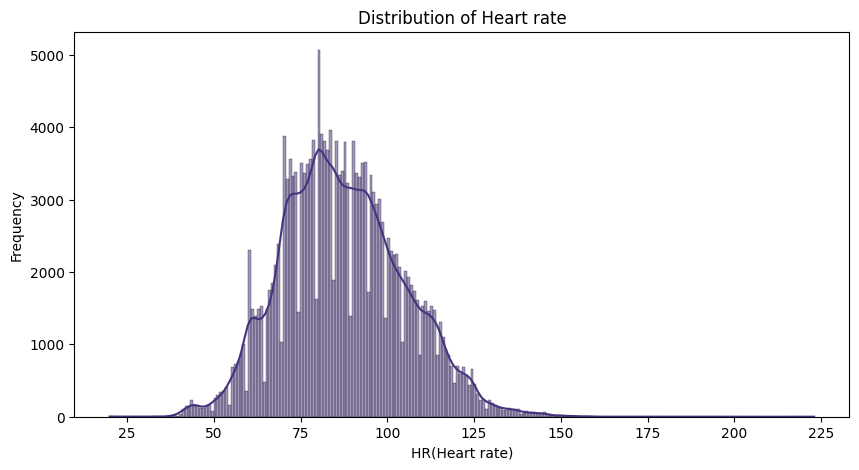

Summary Statistics for HR(Heart rate)
count    185760.000000
mean         87.251762
std          17.485399
min          20.000000
25%          75.000000
50%          86.000000
75%          98.761328
max         223.000000
Name: HR, dtype: float64


In [ ]:
HR_values = sep_data['HR']
plt.figure(figsize=(10, 5))
sns.histplot(HR_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Heart rate')
plt.xlabel('HR(Heart rate)')
plt.ylabel('Frequency')
plt.show()
print('Summary Statistics for HR(Heart rate)')
print(HR_values.describe())

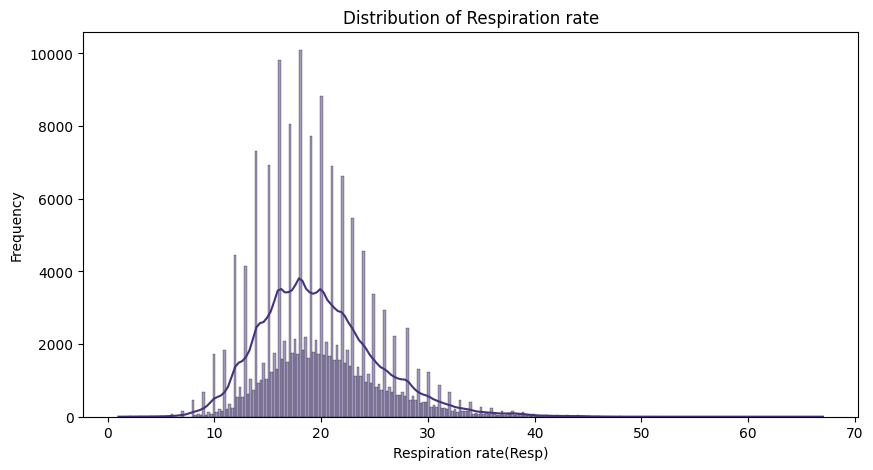

Summary Statistics for Respiration rate(Resp)
count    185760.000000
mean         19.771411
std           5.474712
min           1.000000
25%          16.000000
50%          19.000000
75%          23.000000
max          67.000000
Name: Resp, dtype: float64


In [ ]:
Resp_values = sep_data['Resp']
plt.figure(figsize=(10, 5))
sns.histplot(Resp_values, kde=True, color=sns.color_palette('viridis')[0])
plt.title('Distribution of Respiration rate')
plt.xlabel('Respiration rate(Resp)')
plt.ylabel('Frequency')
plt.show()
print('Summary Statistics for Respiration rate(Resp)')
print(Resp_values.describe())

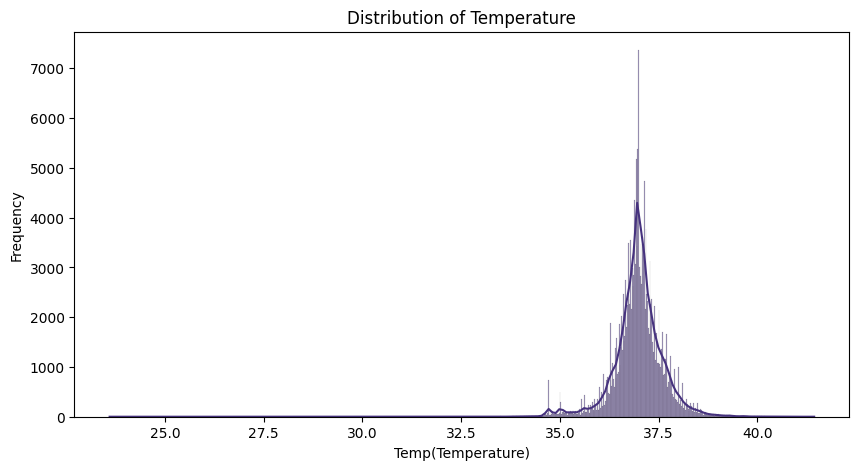

Summary Statistics for Temperature(Temp)
count    185760.000000
mean         36.987281
std           0.626418
min          23.600000
25%          36.714000
50%          36.996000
75%          37.300000
max          41.440000
Name: Temp, dtype: float64


In [ ]:
Temp_values = sep_data['Temp']
plt.figure(figsize=(10,5))
sns.histplot(Temp_values,kde=True,color=sns.color_palette('viridis')[0])
plt.title('Distribution of Temperature')
plt.xlabel('Temp(Temperature)')
plt.ylabel('Frequency')
plt.show()
print("Summary Statistics for Temperature(Temp)")
print(Temp_values.describe())

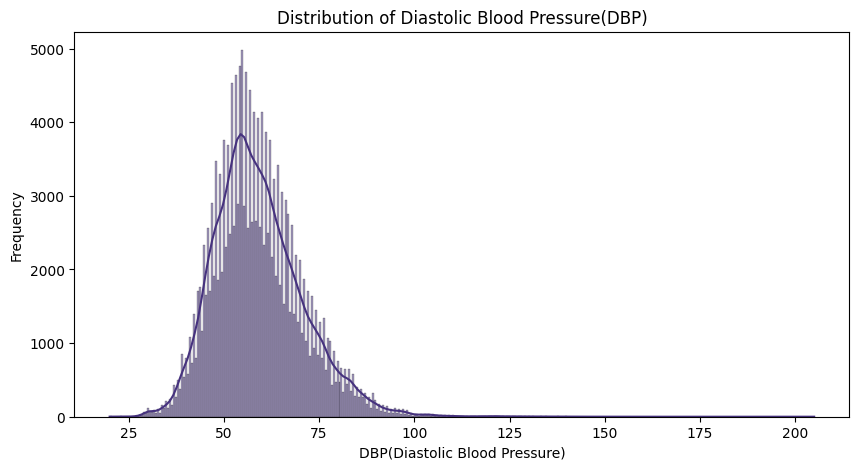

Summary Statistics for Diastolic Blood Pressure(DBP)
count    185760.000000
mean         59.108388
std          11.778986
min          20.000000
25%          51.000000
50%          57.784801
75%          65.937793
max         205.000000
Name: DBP, dtype: float64


In [ ]:
DBP_values=sep_data['DBP']
plt.figure(figsize=(10,5))
sns.histplot(DBP_values,kde=True,color=sns.color_palette('viridis')[0])
plt.title('Distribution of Diastolic Blood Pressure(DBP)')
plt.xlabel('DBP(Diastolic Blood Pressure)')
plt.ylabel('Frequency')
plt.show()
print("Summary Statistics for Diastolic Blood Pressure(DBP)")
print(DBP_values.describe())

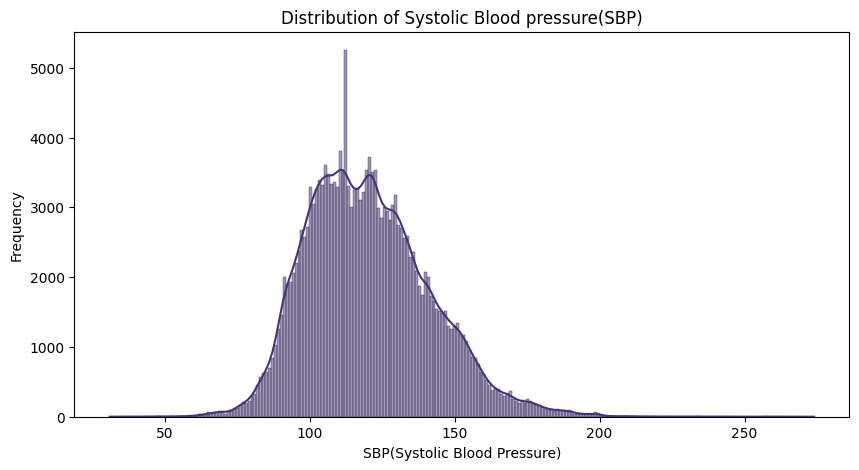

Summary Statistics for Systolic Blood Pressure(SBP)
count    185760.000000
mean        120.331598
std          21.366278
min          31.000000
25%         104.708849
50%         118.400000
75%         133.644839
max         274.000000
Name: SBP, dtype: float64


In [ ]:
SBP_values=sep_data['SBP']
plt.figure(figsize=(10,5))
sns.histplot(SBP_values,kde=True,color=sns.color_palette('viridis')[0])
plt.title('Distribution of Systolic Blood pressure(SBP)')
plt.xlabel('SBP(Systolic Blood Pressure)')
plt.ylabel('Frequency')
plt.show()
print("Summary Statistics for Systolic Blood Pressure(SBP)")
print(SBP_values.describe())


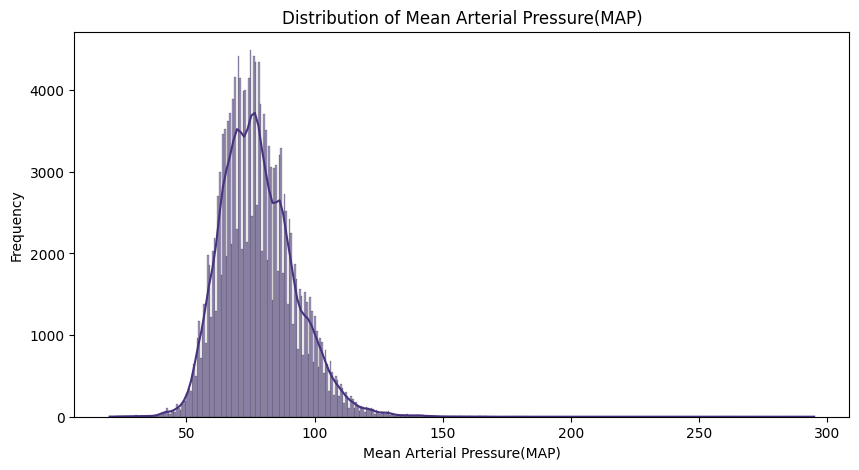

Summary Statistics for Mean Arterial Pressure(MAP)
count    185760.000000
mean         77.901896
std          14.600783
min          20.000000
25%          67.754160
50%          76.400000
75%          86.781371
max         295.000000
Name: MAP, dtype: float64


In [ ]:
MAP_values=sep_data['MAP']
plt.figure(figsize=(10,5))
sns.histplot(MAP_values,kde=True,color=sns.color_palette('viridis')[0])
plt.title('Distribution of Mean Arterial Pressure(MAP)')
plt.xlabel('Mean Arterial Pressure(MAP)')
plt.ylabel('Frequency')
plt.show()
print("Summary Statistics for Mean Arterial Pressure(MAP)")
print(MAP_values.describe())


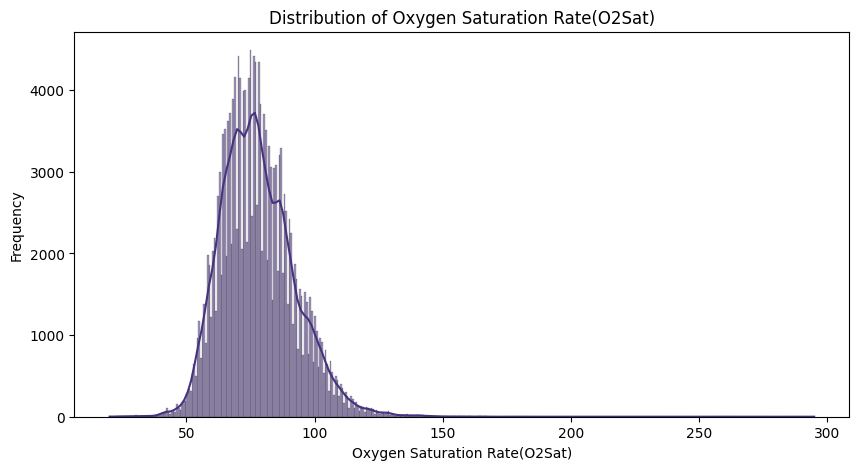

Summary Statistics for Oxygen Saturation Rate(O2Sat)
count    185760.000000
mean         97.212072
std           2.613702
min          22.000000
25%          96.000000
50%          97.700000
75%          99.000000
max         100.000000
Name: O2Sat, dtype: float64


In [ ]:
O2Sat_values=sep_data['O2Sat']
plt.figure(figsize=(10,5))
sns.histplot(MAP_values,kde=True,color=sns.color_palette('viridis')[0])
plt.title('Distribution of Oxygen Saturation Rate(O2Sat)')
plt.xlabel('Oxygen Saturation Rate(O2Sat)')
plt.ylabel('Frequency')
plt.show()
print("Summary Statistics for Oxygen Saturation Rate(O2Sat)")
print(O2Sat_values.describe())


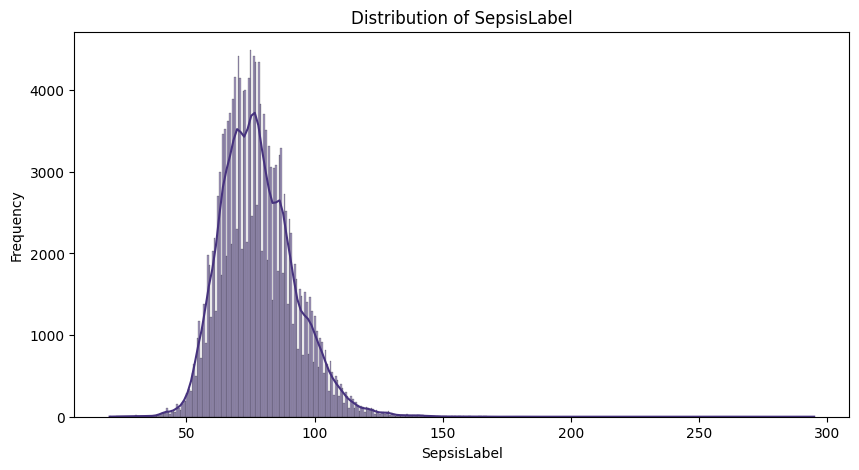

Summary Statistics for SepsisLabel
count    185760.000000
mean          0.500000
std           0.500001
min           0.000000
25%           0.000000
50%           0.500000
75%           1.000000
max           1.000000
Name: SepsisLabel, dtype: float64


In [ ]:
SepsisLabel_values=sep_data['SepsisLabel']
plt.figure(figsize=(10,5))
sns.histplot(MAP_values,kde=True,color=sns.color_palette('viridis')[0])
plt.title('Distribution of SepsisLabel')
plt.xlabel('SepsisLabel')
plt.ylabel('Frequency')
plt.show()
print("Summary Statistics for SepsisLabel")
print(SepsisLabel_values.describe())


<ipython-input-31-37cb29ef800e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sep_data, x='SepsisLabel', palette='viridis')


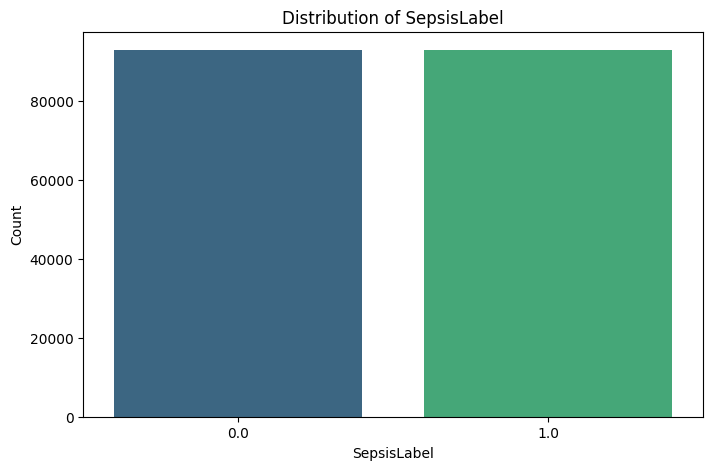

In [ ]:
# Plot the distribution of Sepsiss...
plt.figure(figsize=(8, 5))
sns.countplot(data=sep_data, x='SepsisLabel', palette='viridis')
plt.title('Distribution of SepsisLabel')
plt.xlabel('SepsisLabel')
plt.ylabel('Count')
plt.show()
sepsis_counts = sep_data['SepsisLabel'].value_counts()

# Creating the Age Group Column

In [ ]:
age_intervals = [0,20, 40, 60, 80, 90]
age_labels = ['0-20','21-39', '40-59', '60-79', '80-90']
sep_data['Age Group'] = pd.cut(sep_data['Age'], bins=age_intervals, labels=age_labels)
sep_data['Age Group'] = pd.cut(sep_data['Age'], bins=age_intervals, labels=age_labels)
sep_data.head()

,HR,Resp,Temp,DBP,SBP,MAP,O2Sat,Age,Gender,SepsisLabel,Age Group
0,53.0,21.0,36.110,56.6,126.0,80.0,98.0,55.36,1.0,0.0,40-59
1,78.0,20.0,37.068,49.0,99.0,64.0,94.0,61.01,0.0,0.0,60-79
2,89.8,14.0,37.534,50.6,108.4,79.2,95.6,57.25,1.0,0.0,40-59
3,93.0,26.0,37.364,57.0,155.0,93.0,97.0,72.78,0.0,1.0,60-79
4,96.0,28.0,36.722,55.0,107.0,73.0,100.0,81.81,0.0,0.0,80-90


**Age Group 40-59:**

Patients in this age group might experience sepsis with varying degrees of severity. The presence of sepsis (SepsisLabel = 1.0) might be influenced by factors such as underlying health conditions, but overall, this age group might show a mix of sepsis cases and non-cases.

**Age Group 60-79:**

This group generally includes older individuals who may be more vulnerable to infections and sepsis due to age-related changes in immune function and comorbidities. Thus, you might expect a higher incidence of sepsis compared to younger age groups.

**Age Group 80-90:**

Patients in this age group are the oldest and may have the highest susceptibility to sepsis due to decreased physiological resilience and the increased prevalence of chronic diseases. Sepsis might be more common in this age group, and the severity could be higher.

# ** BIVARIATE ANALYSIS**

- The bivariate analysis will focus on investigating the relationship between age and the various health-related variables.


- Analyzing the relationship between age and other relevant variables in relation to sepsis is essential because understanding how age interacts with these variables can provide valuable insights into the risk factors, progression, and management of sepsis across different age groups.


- Sepsis is a complex medical condition influenced by various factors, and age is a fundamental demographic variable that can significantly impact the likelihood of its occurrence and its outcomes.


- Examining age-specific patterns and associations with variables such as blood pressure, plasma glucose concentration, and other health indicators can identify age-related trends, assess the vulnerability of different age groups to sepsis, and tailor medical interventions and preventive strategies accordingly.


- This analysis helps us develop a more comprehensive understanding of sepsis and the age-specific dynamics of the disease.


- To achieve this, we need to group patients into distinct age groups so that we can explore how specific age groups might be associated with different medical complications or characteristics relevant to sepsis.

# **Bivariate Analysis between 'Age' and 'HR' (Age vs. Heart Rate)**

In [ ]:
age_vs_HR_mean= sep_data.groupby('Age Group')['HR'].mean().reset_index()
age_vs_HR_mean.columns = ['Age Group', 'Mean HR']
age_vs_HR_mean

<ipython-input-33-8db82e6490c8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_vs_HR_mean= sep_data.groupby('Age Group')['HR'].mean().reset_index()


,Age Group,Mean HR
0,0-20,89.463771
1,21-39,93.579701
2,40-59,91.474980
3,60-79,85.301806
4,80-90,82.282240


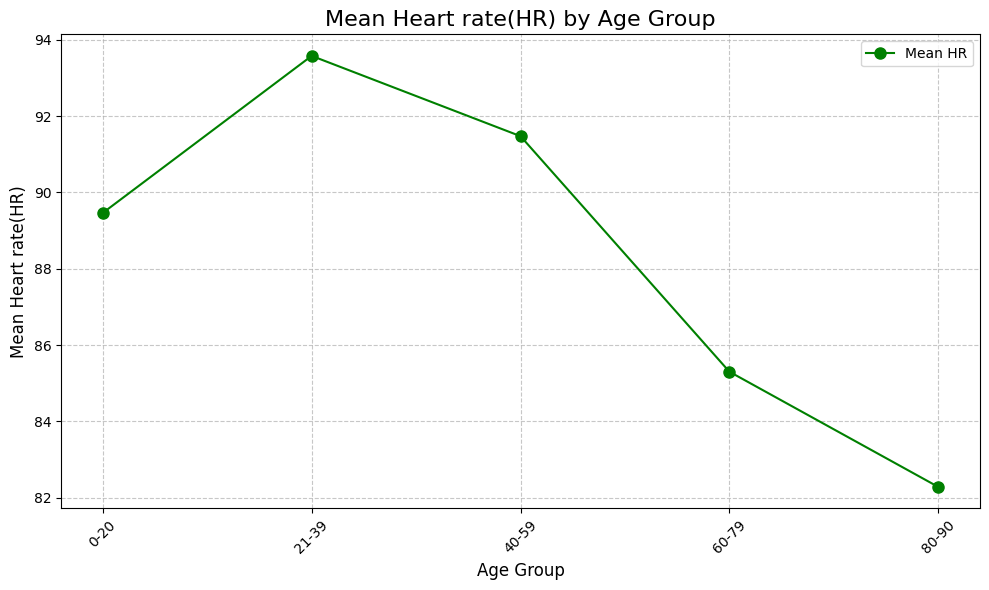

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(age_vs_HR_mean['Age Group'], age_vs_HR_mean['Mean HR'], marker='o', markersize=8, color='green', label='Mean HR', linestyle='-')
plt.title('Mean Heart rate(HR) by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Mean Heart rate(HR)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# **Bivariate Analysis between 'Age' and 'Resp' (Age vs. Respiration rate)**

In [ ]:
age_vs_resp_mean = sep_data.groupby('Age Group')['Resp'].mean().reset_index()
age_vs_resp_mean.columns = ['Age Group', 'Mean Resp']
age_vs_resp_mean

<ipython-input-35-1136e48aadb9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_vs_resp_mean = sep_data.groupby('Age Group')['Resp'].mean().reset_index()


,Age Group,Mean Resp
0,0-20,17.961441
1,21-39,19.283908
2,40-59,19.553732
3,60-79,19.793857
4,80-90,20.424866


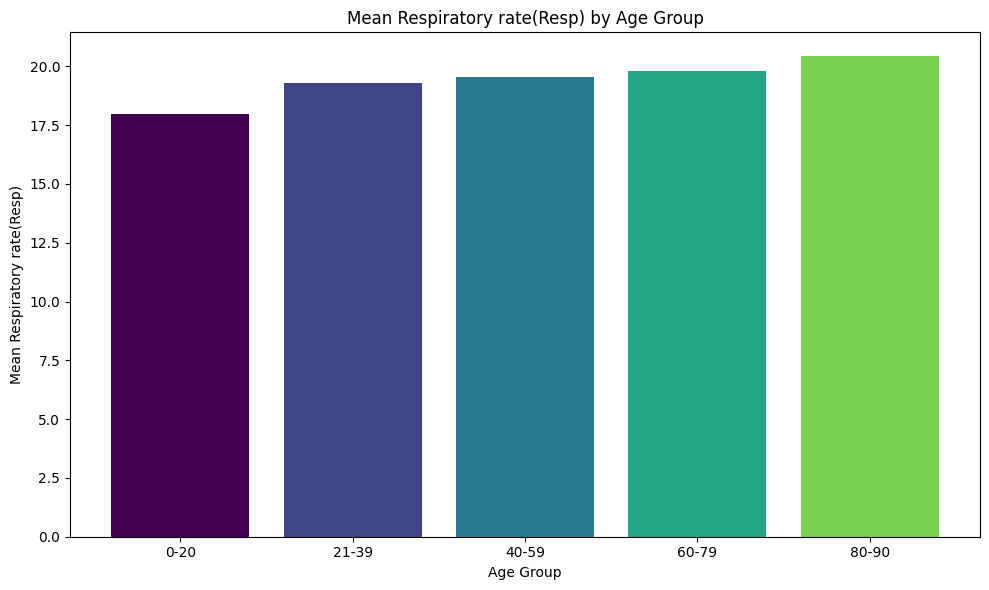

In [ ]:
viridis_colors = plt.cm.viridis(age_vs_resp_mean.index / len(age_vs_resp_mean))
plt.figure(figsize=(10, 6))
plt.bar(age_vs_resp_mean['Age Group'], age_vs_resp_mean['Mean Resp'], color=viridis_colors)
plt.title('Mean Respiratory rate(Resp) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Respiratory rate(Resp)')
plt.tight_layout()
plt.show()



# **BIVARIATE ANALYSIS BETWEEN 'AGE' GROUP AND 'TEMPERATURE' (Age vs Temp)**



In [ ]:
age_vs_temp_mean = sep_data.groupby('Age Group')['Temp'].mean().reset_index()
age_vs_temp_mean.columns = ['Age Group', 'Mean Temp']
age_vs_temp_mean

<ipython-input-37-71849d3cb3a4>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_vs_temp_mean = sep_data.groupby('Age Group')['Temp'].mean().reset_index()


,Age Group,Mean Temp
0,0-20,37.354233
1,21-39,37.394520
2,40-59,36.885728
3,60-79,37.016314
4,80-90,36.837566


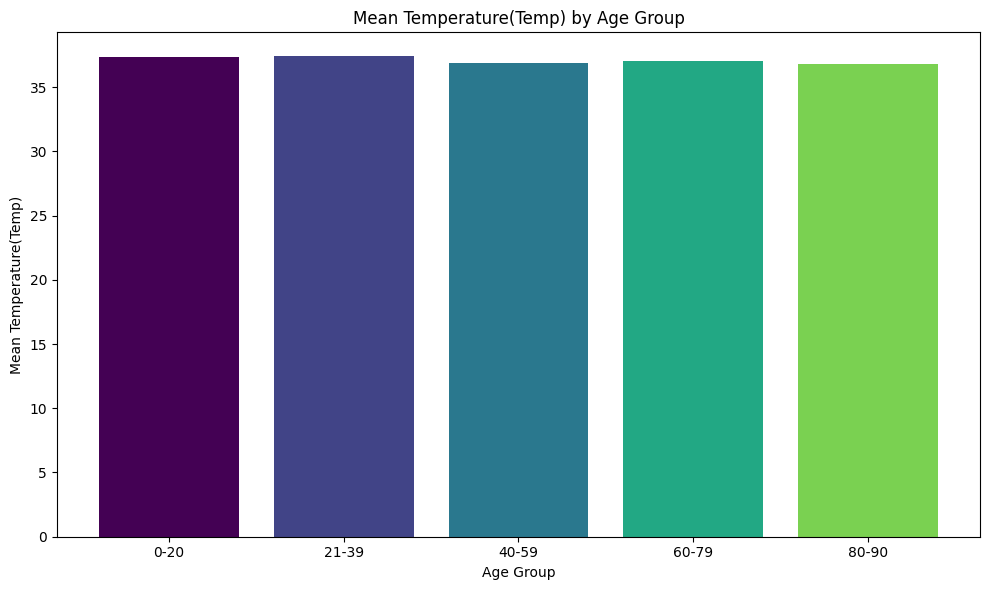

In [ ]:
viridis_colors = plt.cm.viridis(age_vs_temp_mean.index / len(age_vs_temp_mean))
plt.figure(figsize=(10, 6))
plt.bar(age_vs_temp_mean['Age Group'], age_vs_temp_mean['Mean Temp'], color=viridis_colors)
plt.title('Mean Temperature(Temp) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Temperature(Temp)')
plt.tight_layout()
plt.show()

# **BIVARIATE ANALYSIS BETWEEN 'AGE' GROUP AND 'DBP' (Age vs DBP)**

In [ ]:
age_vs_DBP_mean = sep_data.groupby('Age Group')['DBP'].mean().reset_index()
age_vs_DBP_mean.columns = ['Age Group', 'Mean DBP']
age_vs_DBP_mean

<ipython-input-39-997b3962d97a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_vs_DBP_mean = sep_data.groupby('Age Group')['DBP'].mean().reset_index()


,Age Group,Mean DBP
0,0-20,62.936864
1,21-39,65.984665
2,40-59,63.476138
3,60-79,57.155153
4,80-90,53.526635


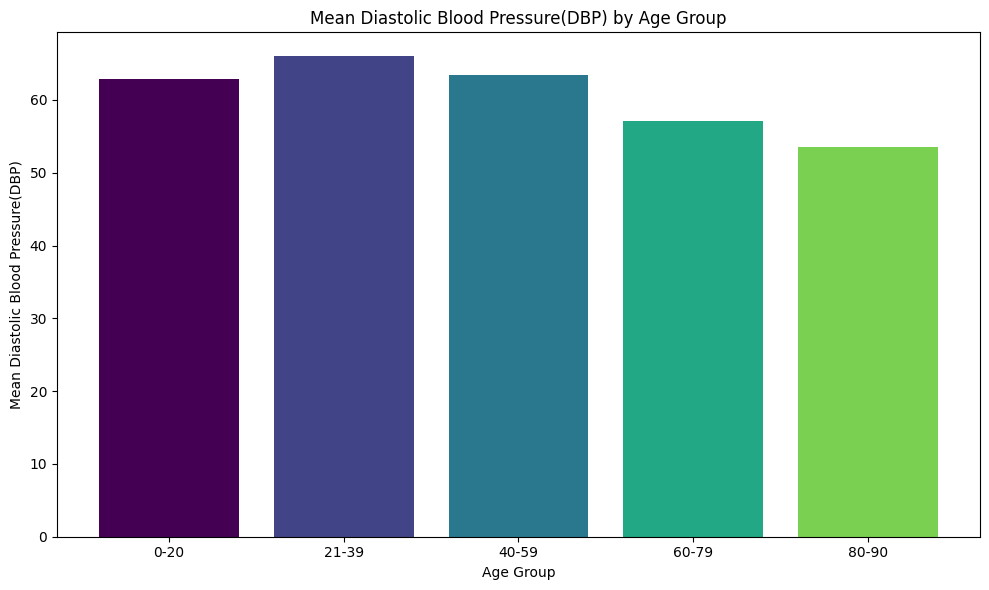

In [ ]:
viridis_colors = plt.cm.viridis(age_vs_DBP_mean.index / len(age_vs_DBP_mean))
plt.figure(figsize=(10, 6))
plt.bar(age_vs_DBP_mean['Age Group'], age_vs_DBP_mean['Mean DBP'], color=viridis_colors)
plt.title('Mean Diastolic Blood Pressure(DBP) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Diastolic Blood Pressure(DBP)')
plt.tight_layout()
plt.show()

# **BIVARIATE ANALYSIS BETWEEN 'AGE' GROUP AND 'SBP' (Age vs SBP)**

In [ ]:
age_vs_SBP_mean = sep_data.groupby('Age Group')['SBP'].mean().reset_index()
age_vs_SBP_mean.columns = ['Age Group', 'Mean SBP']
age_vs_SBP_mean

<ipython-input-41-b4d16944cbc8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_vs_SBP_mean = sep_data.groupby('Age Group')['SBP'].mean().reset_index()


,Age Group,Mean SBP
0,0-20,121.033475
1,21-39,123.189186
2,40-59,119.804633
3,60-79,120.294363
4,80-90,119.802970


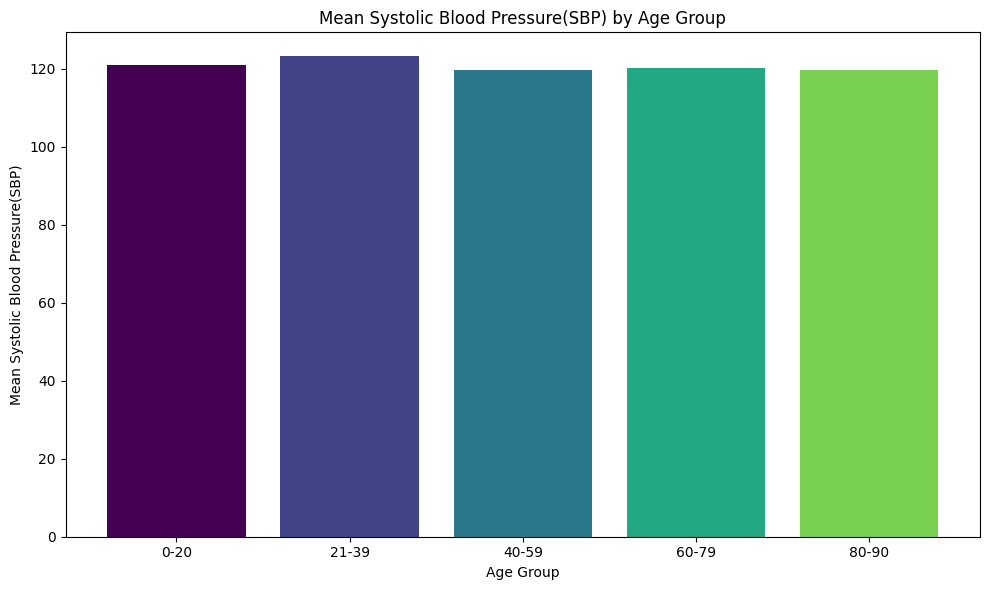

In [ ]:
viridis_colors = plt.cm.viridis(age_vs_SBP_mean.index / len(age_vs_SBP_mean))
plt.figure(figsize=(10, 6))
plt.bar(age_vs_SBP_mean['Age Group'], age_vs_SBP_mean['Mean SBP'], color=viridis_colors)
plt.title('Mean Systolic Blood Pressure(SBP) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Systolic Blood Pressure(SBP)')
plt.tight_layout()
plt.show()

# **BIVARIATE ANALYSIS BETWEEN AGE AND MAP(AGE VS MAP)**

In [ ]:
age_vs_MAP_mean = sep_data.groupby('Age Group')['MAP'].mean().reset_index()
age_vs_MAP_mean.columns = ['Age Group', 'Mean MAP']
age_vs_MAP_mean

<ipython-input-44-5c7e95c609c6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_vs_MAP_mean = sep_data.groupby('Age Group')['MAP'].mean().reset_index()


,Age Group,Mean MAP
0,0-20,78.982513
1,21-39,82.878368
2,40-59,80.382881
3,60-79,76.707950
4,80-90,74.426167


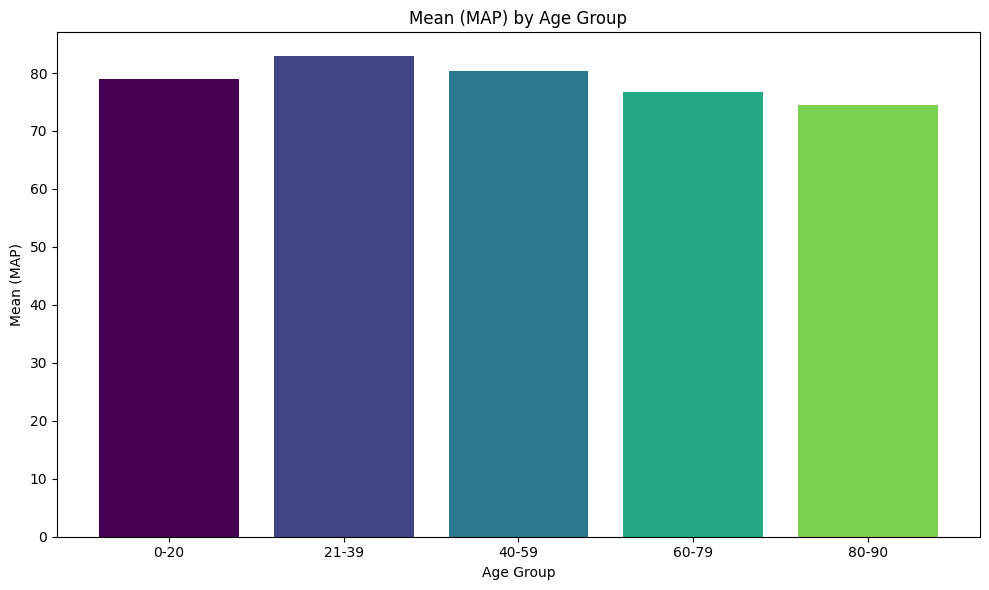

In [ ]:
viridis_colors = plt.cm.viridis(age_vs_MAP_mean.index / len(age_vs_MAP_mean))
plt.figure(figsize=(10, 6))
plt.bar(age_vs_MAP_mean['Age Group'], age_vs_MAP_mean['Mean MAP'], color=viridis_colors)
plt.title('Mean (MAP) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean (MAP)')
plt.tight_layout()
plt.show()

# **BIVARIATE ANALYSIS BETWEEN AGE AND O2Sat(Age vs O2Sat)**

In [ ]:
age_vs_O2Sat_mean = sep_data.groupby('Age Group')['O2Sat'].mean().reset_index()
age_vs_O2Sat_mean.columns = ['Age Group', 'Mean O2Sat']
age_vs_O2Sat_mean

<ipython-input-46-03360030b454>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_vs_O2Sat_mean = sep_data.groupby('Age Group')['O2Sat'].mean().reset_index()


,Age Group,Mean O2Sat
0,0-20,98.540254
1,21-39,97.500148
2,40-59,97.177425
3,60-79,97.229783
4,80-90,97.025730


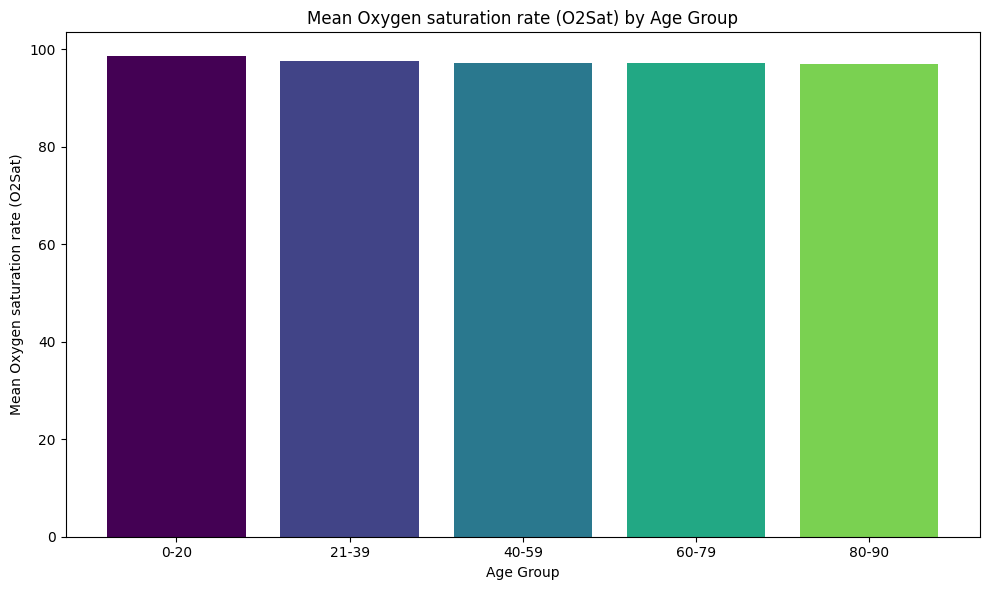

In [ ]:
viridis_colors = plt.cm.viridis(age_vs_O2Sat_mean.index / len(age_vs_O2Sat_mean))
plt.figure(figsize=(10, 6))
plt.bar(age_vs_O2Sat_mean['Age Group'], age_vs_O2Sat_mean['Mean O2Sat'], color=viridis_colors)
plt.title('Mean Oxygen saturation rate (O2Sat) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Oxygen saturation rate (O2Sat)')
plt.tight_layout()
plt.show()

# **Heartrate by sepsis**

<ipython-input-48-865074f694ae>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SepsisLabel', y='HR', data=hr_means, palette='viridis')


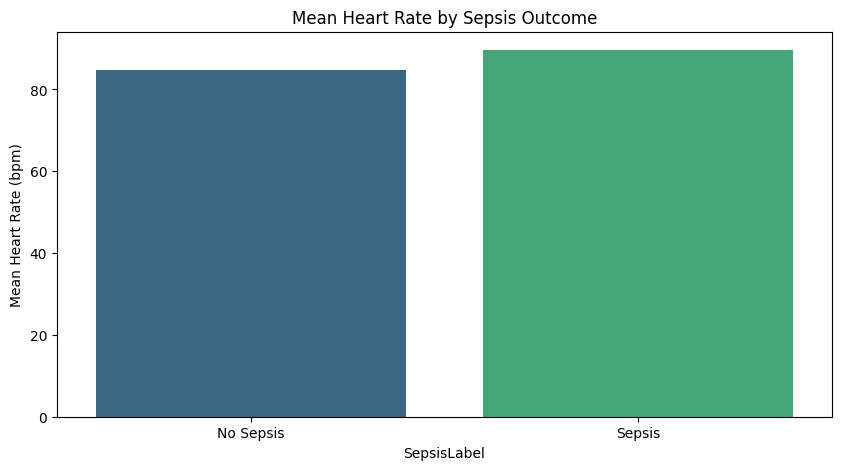

In [ ]:
hr_means = sep_data.groupby('SepsisLabel')['HR'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='SepsisLabel', y='HR', data=hr_means, palette='viridis')
plt.title('Mean Heart Rate by Sepsis Outcome')
plt.xlabel('SepsisLabel')
plt.ylabel('Mean Heart Rate (bpm)')
plt.xticks(ticks=[0, 1], labels=['No Sepsis', 'Sepsis'])
plt.show()

# **Oxygen Saturation vs Respiration Rate by Sepsis Outcome**

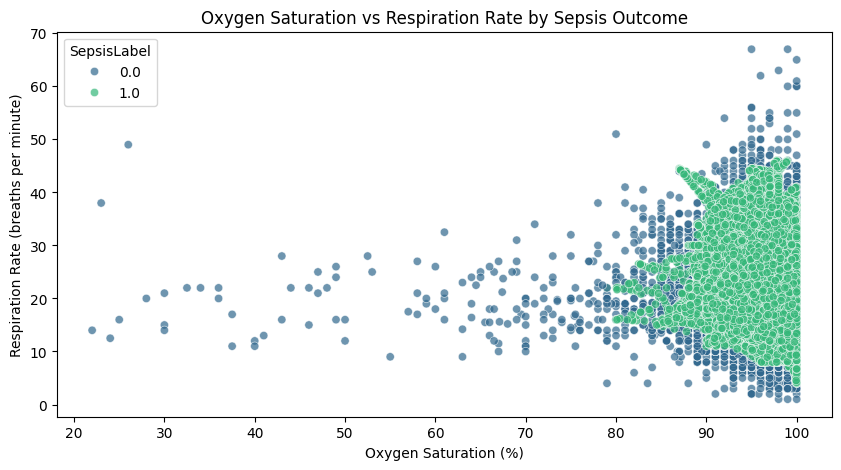

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='O2Sat', y='Resp', hue='SepsisLabel', data=sep_data, palette='viridis', alpha=0.7)
plt.title('Oxygen Saturation vs Respiration Rate by Sepsis Outcome')
plt.xlabel('Oxygen Saturation (%)')
plt.ylabel('Respiration Rate (breaths per minute)')
plt.show()

# **Respiration Rate by Oxygen Saturation and Sepsis Outcome**

<ipython-input-50-a2c7d5586e13>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  o2sat_resp_mean = sep_data.groupby(['O2Sat_bin', 'SepsisLabel'])['Resp'].mean().reset_index()


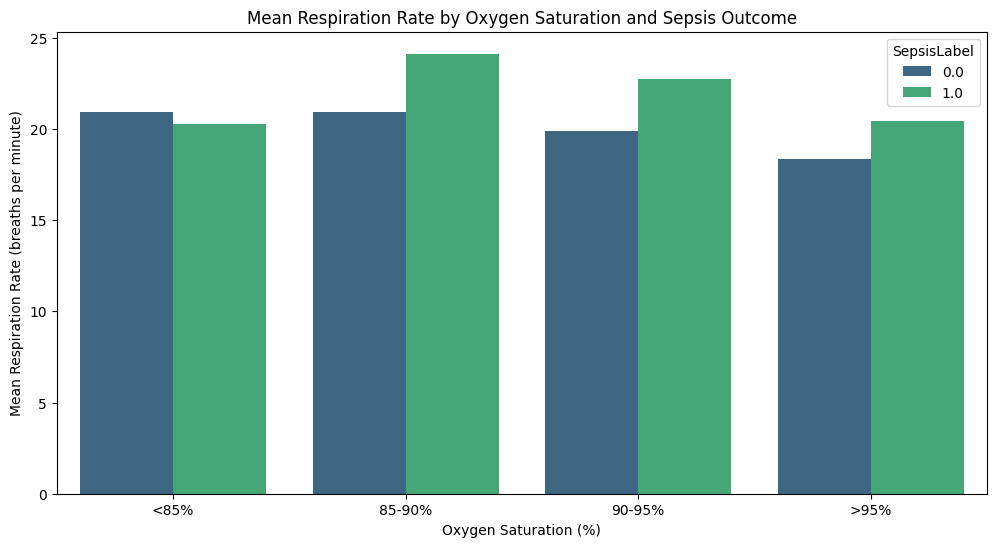

In [ ]:
import seaborn as sns
sep_data['O2Sat_bin'] = pd.cut(sep_data['O2Sat'], bins=[0, 85, 90, 95, 100], labels=['<85%', '85-90%', '90-95%', '>95%'])
o2sat_resp_mean = sep_data.groupby(['O2Sat_bin', 'SepsisLabel'])['Resp'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='O2Sat_bin', y='Resp', hue='SepsisLabel', data=o2sat_resp_mean, palette='viridis')
plt.title('Mean Respiration Rate by Oxygen Saturation and Sepsis Outcome')
plt.xlabel('Oxygen Saturation (%)')
plt.ylabel('Mean Respiration Rate (breaths per minute)')
plt.show()


**Oxygen Saturation Below 85%:** Both sepsis and no sepsis groups show similar mean respiration rates, around 20 breaths per minute.

**Oxygen Saturation 85-90%:** Mean respiration rates remain similar between the two groups, again around 20 breaths per minute.

**Oxygen Saturation 90-95%:** A notable increase in respiration rate is observed in the sepsis group compared to the no sepsis group, approximately 22 vs. 20 breaths per minute.

**Oxygen Saturation Above 95%:** The respiration rate in the sepsis group shows a slight decrease compared to the 90-95% category but remains higher than in the no sepsis group.

# **STATISTICAL ANALYSIS**

**T-test:**Compare the means of a continuous variable between two groups (e.g., sepsis vs. non-sepsis).

**Chi-square test:**
 Assess the relationship between categorical variables.

**Correlation analysis:**
Evaluate the strength and direction of the relationship between two continuous variables.

# **Testing whether there are significant differences in heart rate, respiration rate, and oxygen saturation between sepsis and non-sepsis groups using a t-test.**

In [ ]:
from scipy.stats import ttest_ind, chi2_contingency, pearsonr
sepsis_group = sep_data[sep_data['SepsisLabel'] == 1]
non_sepsis_group = sep_data[sep_data['SepsisLabel'] == 0]
hr_ttest = ttest_ind(sepsis_group['HR'], non_sepsis_group['HR'])
print(f"Heart Rate T-test: Statistic={hr_ttest.statistic:.2f}, p-value={hr_ttest.pvalue:.4f}")
resp_ttest = ttest_ind(sepsis_group['Resp'], non_sepsis_group['Resp'])
print(f"Respiration Rate T-test: Statistic={resp_ttest.statistic:.2f}, p-value={resp_ttest.pvalue:.4f}")
o2sat_ttest = ttest_ind(sepsis_group['O2Sat'], non_sepsis_group['O2Sat'])
print(f"Oxygen Saturation T-test: Statistic={o2sat_ttest.statistic:.2f}, p-value={o2sat_ttest.pvalue:.4f}")

Heart Rate T-test: Statistic=59.27, p-value=0.0000
Respiration Rate T-test: Statistic=85.99, p-value=0.0000
Oxygen Saturation T-test: Statistic=-1.81, p-value=0.0709


**Heart Rate T-test**

Statistic = 59.27, p-value = 0.0000

**Interpretation:**

The p-value is much less than 0.05, indicating a statistically significant difference in the mean heart rate between the sepsis and non-sepsis groups.
A high t-statistic suggests a large effect size, meaning that heart rate is substantially different between the two groups, potentially serving as an important feature for distinguishing sepsis cases.

**Respiration Rate T-test**

Statistic = 85.99, p-value = 0.0000

**Interpretation:**

Similarly, the p-value is far below 0.05, confirming a statistically significant difference in respiration rates between the groups.
The very high t-statistic further implies a strong difference, making respiration rate another key variable in identifying sepsis.

**Oxygen Saturation T-test**

Statistic = -1.81, p-value = 0.0709

**Interpretation:**

The p-value is slightly above the conventional threshold of 0.05, suggesting that there is no statistically significant difference in oxygen saturation levels between sepsis and non-sepsis groups.
While there might be a trend, the lack of significance indicates that oxygen saturation might not be as strong a differentiator between the groups as heart rate and respiration rate.

In [ ]:
hr_resp_corr, _ = pearsonr(sep_data['HR'], sep_data['Resp'])
hr_o2sat_corr, _ = pearsonr(sep_data['HR'], sep_data['O2Sat'])
hr_temp_corr, _ = pearsonr(sep_data['HR'], sep_data['Temp'])
print(f"Correlation between Heart Rate and Respiration Rate: {hr_resp_corr:.2f}")
print(f"Correlation between Heart Rate and Oxygen Saturation: {hr_o2sat_corr:.2f}")
print(f"Correlation between Heart Rate and Temperature: {hr_temp_corr:.2f}")

Correlation between Heart Rate and Respiration Rate: 0.25
Correlation between Heart Rate and Oxygen Saturation: -0.09
Correlation between Heart Rate and Temperature: 0.16


# **Interpretation of Correlation Coefficients**

**Correlation between Heart Rate and Respiration Rate**

Correlation Coefficient = 0.25

**Interpretation:**

A correlation coefficient of 0.25 indicates a weak positive linear relationship between heart rate and respiration rate.
This suggests that as the heart rate increases, the respiration rate tends to increase slightly as well, but the relationship is not strong.

**Correlation between Heart Rate and Oxygen Saturation**

Correlation Coefficient = -0.09

**Interpretation:**

A correlation coefficient of -0.09 suggests a very weak negative linear relationship between heart rate and oxygen saturation.
This implies that higher heart rates are slightly associated with lower oxygen saturation levels, but the relationship is weak and may not be clinically significant.

**Correlation between Heart Rate and Temperature**

Correlation Coefficient = 0.16

**Interpretation:**

A correlation coefficient of 0.16 indicates a weak positive linear relationship between heart rate and temperature.
This means that as the temperature increases, the heart rate tends to increase slightly, but the relationship is not strong.

In [ ]:
from scipy.stats import ttest_ind

# Diastolic Blood Pressure (DBP) T-test
dbp_ttest = ttest_ind(sepsis_group['DBP'], non_sepsis_group['DBP'], nan_policy='omit')
print(f"Diastolic Blood Pressure T-test: Statistic={dbp_ttest.statistic:.2f}, p-value={dbp_ttest.pvalue:.4f}")

# Systolic Blood Pressure (SBP) T-test
sbp_ttest = ttest_ind(sepsis_group['SBP'], non_sepsis_group['SBP'], nan_policy='omit')
print(f"Systolic Blood Pressure T-test: Statistic={sbp_ttest.statistic:.2f}, p-value={sbp_ttest.pvalue:.4f}")

# Mean Arterial Pressure (MAP) T-test
map_ttest = ttest_ind(sepsis_group['MAP'], non_sepsis_group['MAP'], nan_policy='omit')
print(f"Mean Arterial Pressure T-test: Statistic={map_ttest.statistic:.2f}, p-value={map_ttest.pvalue:.4f}")

# Temperature (Temp) T-test
temp_ttest = ttest_ind(sepsis_group['Temp'], non_sepsis_group['Temp'], nan_policy='omit')
print(f"Temperature T-test: Statistic={temp_ttest.statistic:.2f}, p-value={temp_ttest.pvalue:.4f}")


Diastolic Blood Pressure T-test: Statistic=-16.29, p-value=0.0000
Systolic Blood Pressure T-test: Statistic=-10.53, p-value=0.0000
Mean Arterial Pressure T-test: Statistic=-20.87, p-value=0.0000
Temperature T-test: Statistic=43.31, p-value=0.0000


# **Interpretation of T-test Results**

**Diastolic Blood Pressure (DBP)**

Statistic = -16.29, p-value = 0.0000

**Interpretation:**

The p-value is much less than 0.05, indicating a statistically significant difference in diastolic blood pressure between the sepsis and non-sepsis groups.
The negative t-statistic suggests that the mean diastolic blood pressure is lower in the sepsis group compared to the non-sepsis group.

**Systolic Blood Pressure (SBP)**

Statistic = -10.53, p-value = 0.0000

**Interpretation:**

The p-value is significantly below 0.05, confirming a statistically significant difference in systolic blood pressure between the two groups.
The negative t-statistic indicates that the mean systolic blood pressure is also lower in the sepsis group.

**Mean Arterial Pressure (MAP)**

Statistic = -20.87, p-value = 0.0000

**Interpretation:**

A p-value of 0.0000 signifies a significant difference in mean arterial pressure between groups.
The negative t-statistic shows that the sepsis group has a lower mean arterial pressure compared to the non-sepsis group, which aligns with clinical knowledge, as sepsis can lead to hypotension.

**Temperature (Temp)**

Statistic = 43.31, p-value = 0.0000

**Interpretation:**

The p-value indicates a highly significant difference in temperature between the two groups.
The positive t-statistic suggests that the mean temperature is higher in the sepsis group, which is consistent with the presence of fever as a common symptom of sepsis.

# **Analytical Questions**

1.Feature Correlation with Sepsis: Which features have the strongest correlation with sepsis? Understanding this can help identify potential risk factors.

2.Demographic and Clinical Differences: How do demographic and clinical features (like age and vital signs) differ between patients with and without sepsis?

3.Interaction Effects: Are there any interaction effects between features that significantly impact the likelihood of sepsis?


5.Cluster Analysis: Can we identify distinct clusters of patients based on their features, and how do these clusters relate to sepsis outcomes?





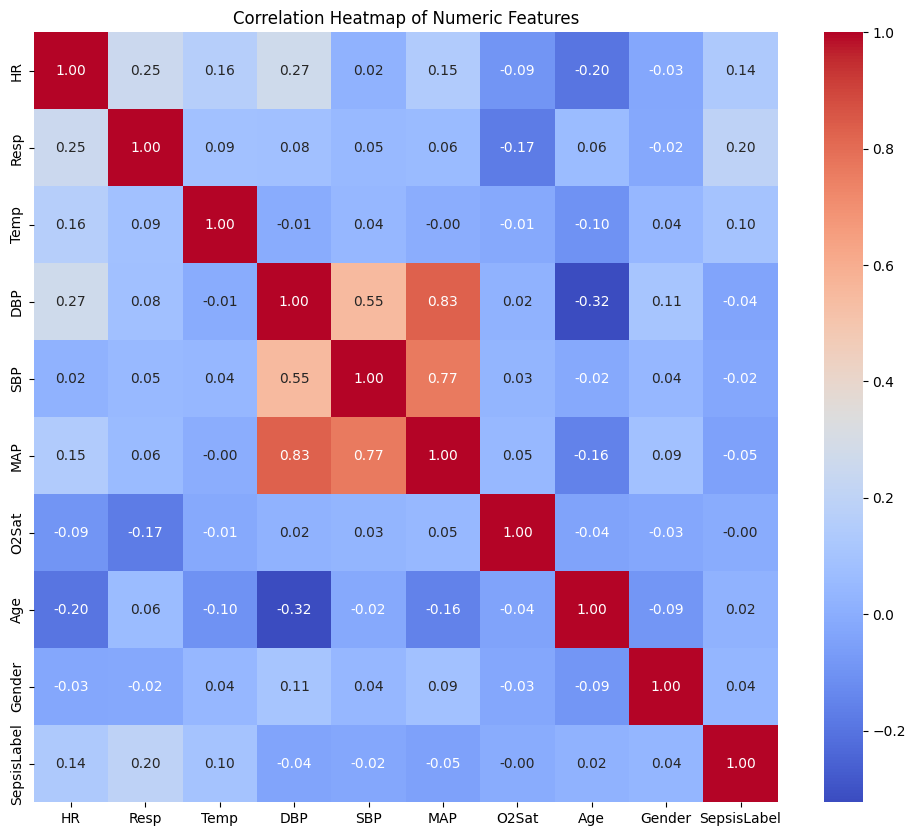

Correlation with SepsisLabel:
 SepsisLabel    1.000000
Resp           0.195651
HR             0.136232
Temp           0.099993
Gender         0.038394
Age            0.019670
O2Sat         -0.004191
SBP           -0.024431
DBP           -0.037772
MAP           -0.048375
Name: SepsisLabel, dtype: float64


In [ ]:
numeric_data = sep_data.select_dtypes(include=[np.number])
#correlation matrix for numeric data..
correlation_matrix = numeric_data.corr()
#correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()
# Sorting correlations with SepsisLabel..
corr_with_sepsis = correlation_matrix['SepsisLabel'].sort_values(ascending=False)
print("Correlation with SepsisLabel:\n", corr_with_sepsis)

<ipython-input-55-d6390d0beeb0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SepsisLabel', y=var, data=sep_data, palette='viridis')


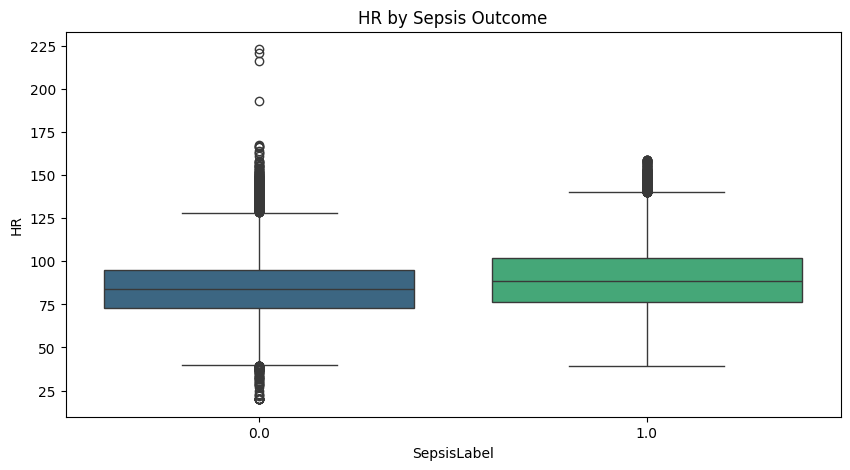

<ipython-input-55-d6390d0beeb0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SepsisLabel', y=var, data=sep_data, palette='viridis')


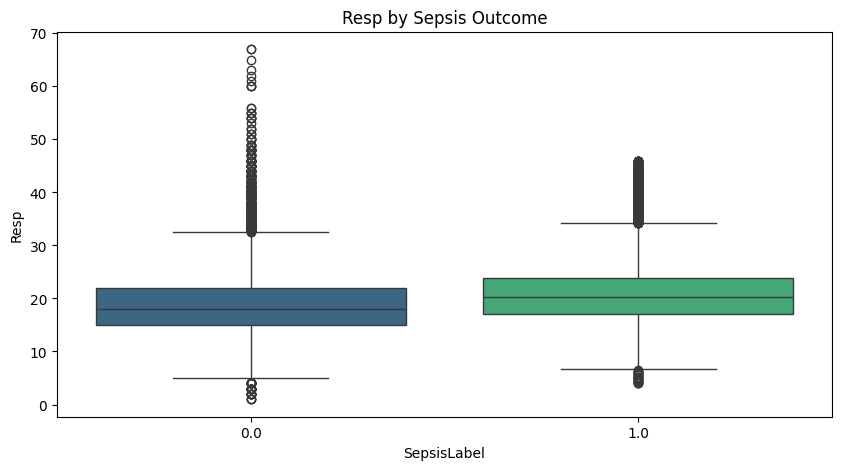

<ipython-input-55-d6390d0beeb0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SepsisLabel', y=var, data=sep_data, palette='viridis')


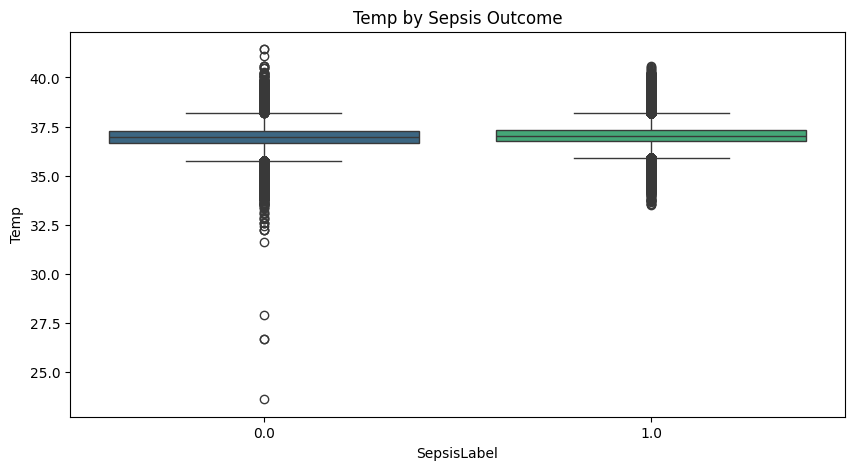

<ipython-input-55-d6390d0beeb0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SepsisLabel', y=var, data=sep_data, palette='viridis')


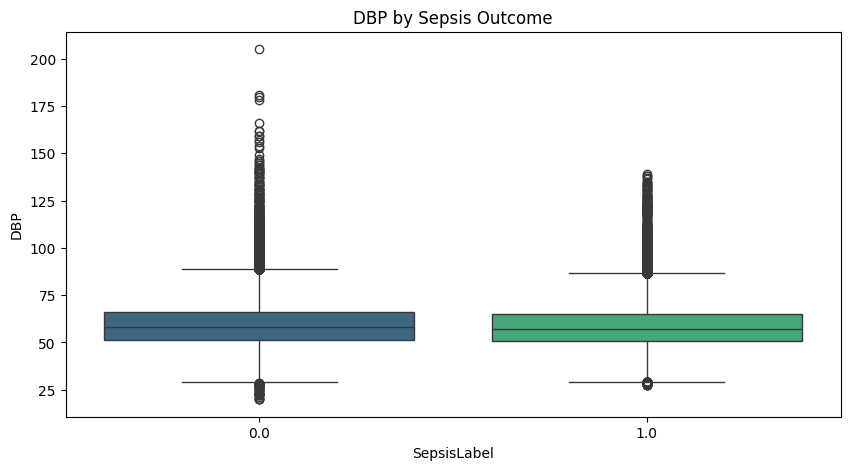

<ipython-input-55-d6390d0beeb0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SepsisLabel', y=var, data=sep_data, palette='viridis')


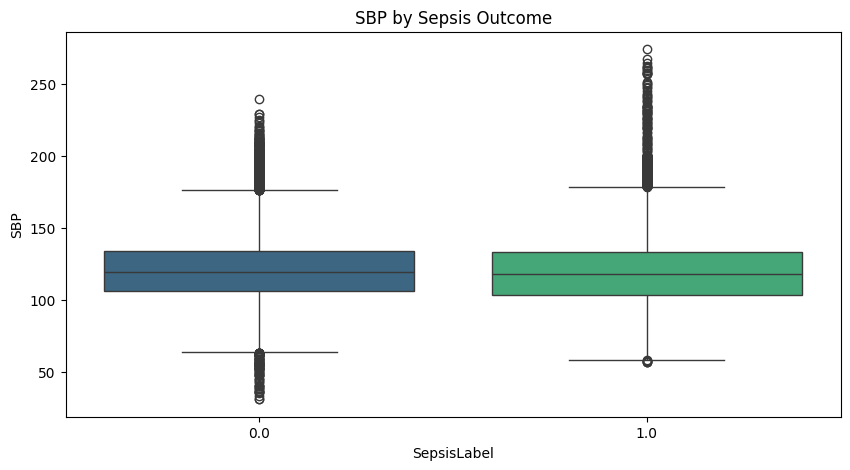

<ipython-input-55-d6390d0beeb0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SepsisLabel', y=var, data=sep_data, palette='viridis')


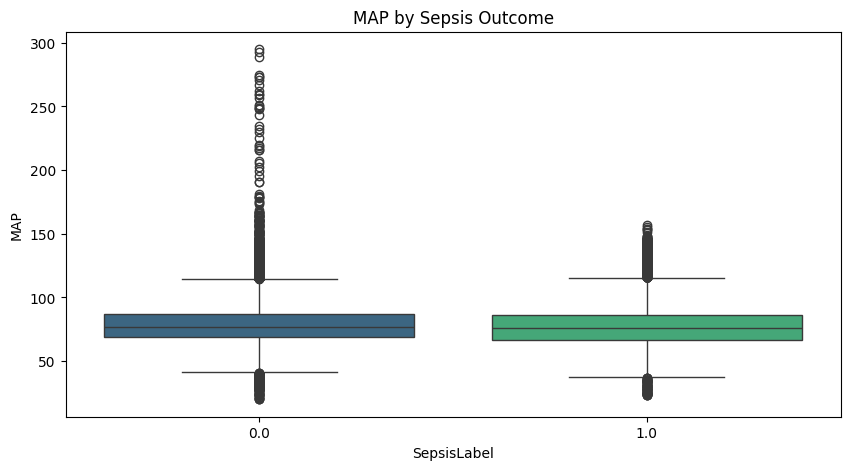

<ipython-input-55-d6390d0beeb0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SepsisLabel', y=var, data=sep_data, palette='viridis')


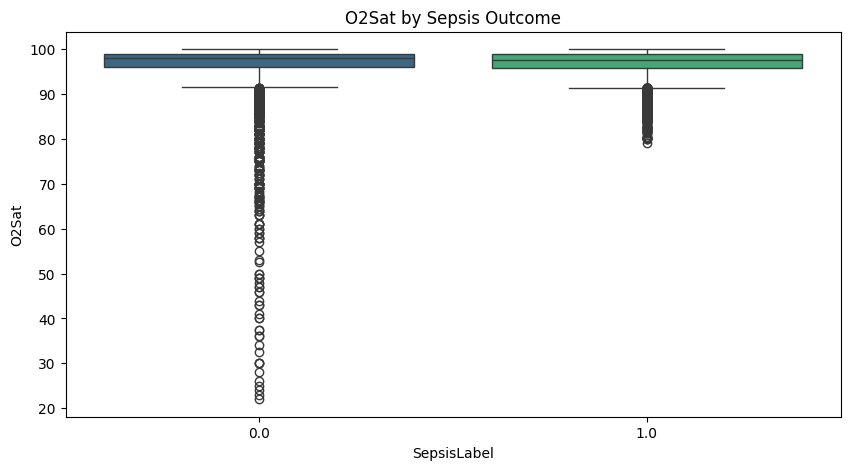

<ipython-input-55-d6390d0beeb0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SepsisLabel', y=var, data=sep_data, palette='viridis')


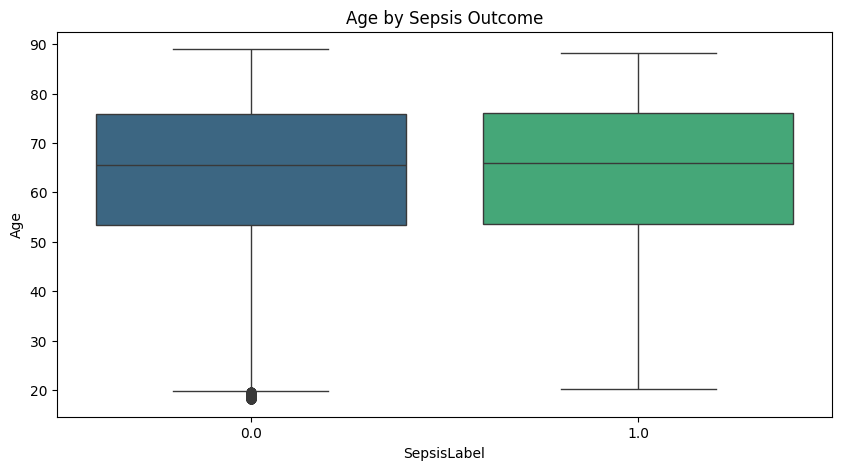

In [ ]:
#continuous variables
Con = ['HR', 'Resp', 'Temp', 'DBP', 'SBP', 'MAP', 'O2Sat', 'Age']

# Plot box plots for each continuous variable
for i in Con:
    plt.figure(figsize=(12, 5))
    sns.boxplot(x='SepsisLabel', y=i, data=sep_data, palette='viridis')
    plt.title(f'{i} by Sepsis Outcome')
    plt.xlabel('SepsisLabel')
    plt.ylabel(i)
    plt.show()


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [ ]:
#interaction term between HR and Resp
interaction_model = ols('SepsisLabel ~ HR * Resp', data=sep_data).fit()
print(interaction_model.summary())

                            OLS Regression Results                            
Dep. Variable:            SepsisLabel   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     3107.
Date:                Fri, 16 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:28:05   Log-Likelihood:            -1.3028e+05
No. Observations:              185760   AIC:                         2.606e+05
Df Residuals:                  185756   BIC:                         2.606e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3886      0.022    -17.890      0.0

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Non-numeric columns: ['Age Group', 'O2Sat_bin', 'Cluster Label']
                HR       Resp       Temp        DBP         SBP        MAP  \
Cluster                                                                      
0        76.632025  17.308506  36.818365  52.149772  112.395215  70.324278   
1        99.244313  23.317939  37.233019  56.275634  110.146370  71.652287   
2        91.242361  19.976056  36.998960  71.793918  141.350572  94.697124   

             O2Sat        Age    Gender  SepsisLabel  Cluster  
Cluster                                                        
0        97.852206  68.565833  0.565478     0.454217      0.0  
1        95.894344  61.518041  0.568870     0.587667      1.0  
2        97.531861  58.452392  0.662176     0.483325      2.0  


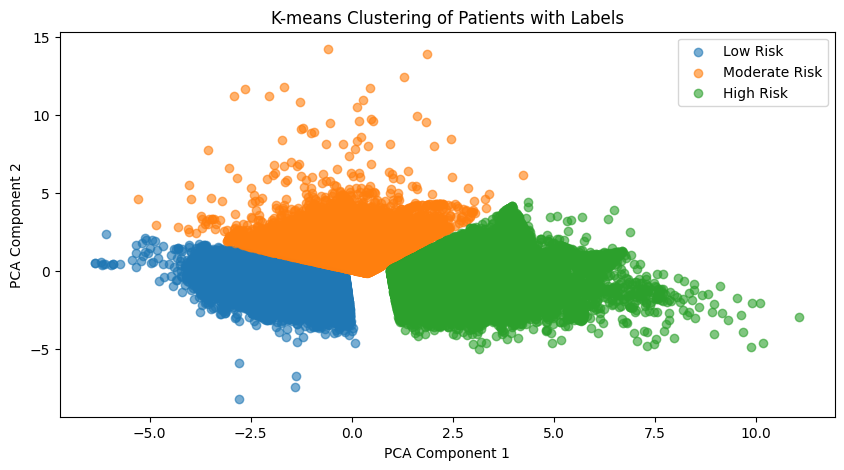

In [ ]:
features_for_clustering = sep_data.drop(['SepsisLabel'], axis=1)
non_numeric_columns = features_for_clustering.select_dtypes(exclude=[np.number]).columns
print(f"Non-numeric columns: {non_numeric_columns.tolist()}")
features_for_clustering = features_for_clustering.drop(non_numeric_columns, axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)
numeric_columns = sep_data.select_dtypes(include=[np.number]).columns
cluster_means = sep_data[numeric_columns].groupby(sep_data['Cluster']).mean()
print(cluster_means)
cluster_labels = {
    0: 'Low Risk',  #lower values of HR, Temp, etc......
    1: 'Moderate Risk',  #moderate values of vitals....
    2: 'High Risk'  #higher values of HR, Temp, etc....
}

# Maping the cluster labels
sep_data['Cluster Label'] = sep_data['Cluster'].map(cluster_labels)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)
# Plot
plt.figure(figsize=(10, 5))
for label in cluster_labels.values():
    cluster_data = reduced_data[sep_data['Cluster Label'] == label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=label, alpha=0.6)

plt.title('K-means Clustering of Patients with Labels')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


# **Labels Based on Clustering:**

**Low Risk (Cluster 0):**

 Older patients with relatively stable vitals, lower heart rates, respiratory rates, and higher oxygen saturation.

**Moderate Risk (Cluster 1):**

Patients with elevated heart rates, respiratory rates, temperatures, and lower oxygen saturation, indicating moderate risk.

**High Risk (Cluster 2):**

 Younger patients with significantly higher blood pressure and moderately elevated vitals, representing a higher risk group, possibly due to hypertension-related issues.

In [ ]:
from scipy.stats import ttest_ind
variables_to_test = ['HR', 'Resp', 'O2Sat', 'DBP', 'SBP', 'MAP', 'Temp']
p_values = []
for var in variables_to_test:
    t_stat, p_value = ttest_ind(sepsis_group[var], non_sepsis_group[var], nan_policy='omit')
    p_values.append(p_value)
    print(f"{var} T-test: Statistic={t_stat:.2f}, p-value={p_value:.4f}")
alpha = 0.05
m = len(variables_to_test)
alpha_adjusted = alpha / m
print(f"\nBonferroni-adjusted significance level: {alpha_adjusted:.4f}")
significant_variables = [var for var, p_value in zip(variables_to_test, p_values) if p_value < alpha_adjusted]
print(f"\nVariables significant after Bonferroni correction: {significant_variables}")

HR T-test: Statistic=59.27, p-value=0.0000
Resp T-test: Statistic=85.99, p-value=0.0000
O2Sat T-test: Statistic=-1.81, p-value=0.0709
DBP T-test: Statistic=-16.29, p-value=0.0000
SBP T-test: Statistic=-10.53, p-value=0.0000
MAP T-test: Statistic=-20.87, p-value=0.0000
Temp T-test: Statistic=43.31, p-value=0.0000

Bonferroni-adjusted significance level: 0.0071

Variables significant after Bonferroni correction: ['HR', 'Resp', 'DBP', 'SBP', 'MAP', 'Temp']


# **Significant Variables After Bonferroni Correction:**

HR (Heart Rate)

Resp (Respiration Rate)

DBP (Diastolic Blood Pressure)

SBP (Systolic Blood Pressure)

MAP (Mean Arterial Pressure)

Temp (Temperature) **

These variables have p-values that are below the adjusted significance level of 0.0071, indicating strong evidence that their means differ significantly between the sepsis and non-sepsis groups.

# **Non-Significant Variable:**

**O2Sat (Oxygen Saturation)**

With a p-value of 0.0709, O2Sat did not meet the stricter Bonferroni-adjusted significance threshold, meaning the difference in oxygen saturation between the sepsis and non-sepsis groups is not statistically significant after accounting for multiple comparisons.